In [3]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
avg = 1
stdDev = .1
numReps = 10
numSimulations = 1000

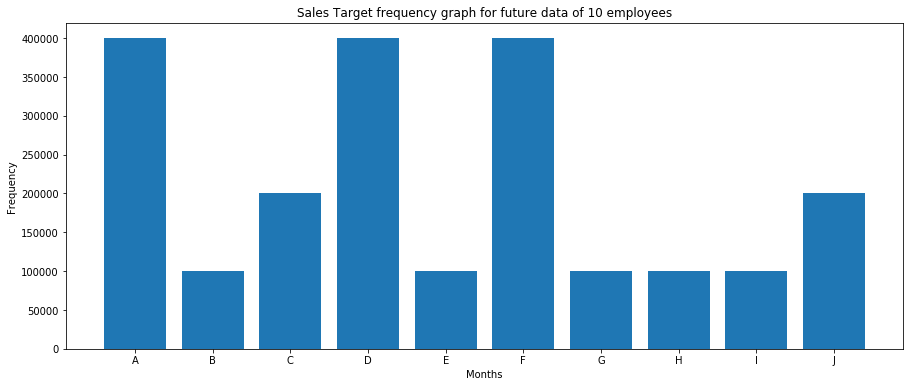

In [5]:
pctToTarget = np.random.normal(avg, stdDev, numReps).round(2)
salesTargetValues = [100000, 200000, 500000, 400000, 500000]
representatives = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
salesTargetProb = [.3, .3, .2, .15, .05]
salesTarget = np.random.choice(salesTargetValues, numReps, p=salesTargetProb)
plt.figure(figsize=(15,6))
plt.bar(representatives, salesTarget)
plt.title("Sales Target frequency graph for future data of 10 employees")
plt.xlabel("Months")
plt.ylabel("Frequency")

presentDataFrame = pd.DataFrame(index=range(numReps), data={'representatives': representatives,
                                               'salesTargetValues': salesTarget})
export_json = presentDataFrame.to_json(r'C:\Users\Aahad\Desktop\FYP\predictive-analytics\src\containers\phase1\Phase 1 JSON\10 Employees\salesfrequency.json')

In [6]:
df = pd.DataFrame(index=range(numReps), data={'Pct To Target': pctToTarget,
                                               'Sales Target': salesTarget})

df['Sales'] = df['Pct To Target'] * df['Sales Target']
df

,Pct To Target,Sales Target,Sales
0,1.14,400000,456000.0
1,0.87,100000,87000.0
2,0.90,200000,180000.0
3,1.05,400000,420000.0
4,0.92,100000,92000.0
5,1.14,400000,456000.0
6,0.86,100000,86000.0
7,0.91,100000,91000.0
8,0.89,100000,89000.0
9,1.00,200000,200000.0


In [7]:
def calc_commission_rate(x):
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [8]:
df['Commission Rate'] = df['Pct To Target'].apply(calc_commission_rate)
df['Commission Amount'] = df['Commission Rate'] * df['Sales']
df

,Pct To Target,Sales Target,Sales,Commission Rate,Commission Amount
0,1.14,400000,456000.0,0.04,18240.0
1,0.87,100000,87000.0,0.02,1740.0
2,0.90,200000,180000.0,0.02,3600.0
3,1.05,400000,420000.0,0.04,16800.0
4,0.92,100000,92000.0,0.03,2760.0
5,1.14,400000,456000.0,0.04,18240.0
6,0.86,100000,86000.0,0.02,1720.0
7,0.91,100000,91000.0,0.03,2730.0
8,0.89,100000,89000.0,0.02,1780.0
9,1.00,200000,200000.0,0.04,8000.0


In [9]:
all_stats = []

for i in range(numSimulations):
    salesTarget = np.random.choice(salesTargetValues, numReps, p=salesTargetProb)

    pctToTarget = np.random.normal(avg, stdDev, numReps).round(2)

    df = pd.DataFrame(index=range(numReps), data={'Pct To Target': pctToTarget,
                                                   'Sales Target': salesTarget})

    df['Sales'] = df['Pct To Target'] * df['Sales Target']
    df['Commission Rate'] = df['Pct To Target'].apply(calc_commission_rate)
    df['Commission Amount'] = df['Commission Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission Amount'].sum().round(0),
                      df['Sales Target'].sum().round(0)])

In [10]:
resultsDf = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission Amount',
                                                           'Sales Target'])
resultsDf.describe().style.format('{:,}')

,Sales,Commission Amount,Sales Target
count,"1,000.0","1,000.0","1,000.0"
mean,"2,748,139.0","93,910.75","2,745,900.0"
std,"523,629.76405931014","20,605.90031678707","505,567.7885197877"
min,"1,287,000.0","43,310.0","1,200,000.0"
25%,"2,394,500.0","80,075.0","2,400,000.0"
50%,"2,759,000.0","93,465.0","2,700,000.0"
75%,"3,109,000.0","107,452.5","3,100,000.0"
max,"4,450,000.0","164,700.0","4,300,000.0"


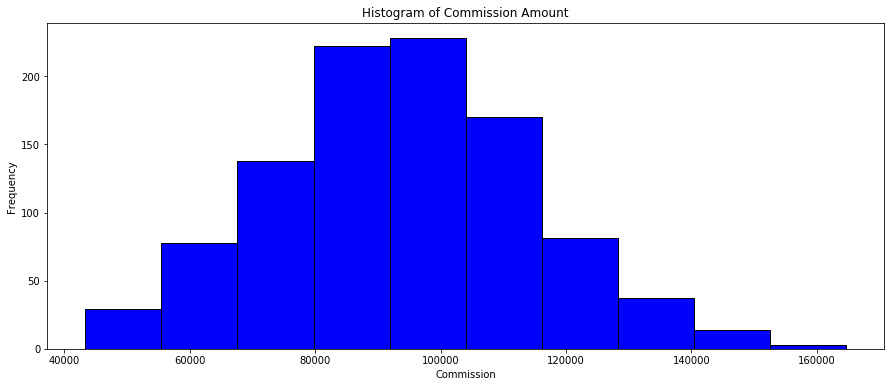

In [11]:
plt.figure(figsize=(15,6))
plt.title('Histogram of Commission Amount')
plt.xlabel('Commission')
plt.ylabel('Frequency')
plt.hist(resultsDf['Commission Amount'], color = 'blue', edgecolor = 'black',
         bins = int(len(resultsDf['Commission Amount'])/100));
export_json = resultsDf['Commission Amount'].to_json(r'C:\Users\Aahad\Desktop\FYP\predictive-analytics\src\containers\phase1\Phase 1 JSON\10 Employees\avgCommission.json')